# Data Analysis on Perturbation Runs

## Runs previously done

The below bash scripts have been run, and should exactlycorrespond to the data within `./data`

## Data Analysis for Run Data

In [5]:
%load_ext rpy2.ipython
import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore", category=RRuntimeWarning)

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


# Lattice Graph, Randomized Perturbation

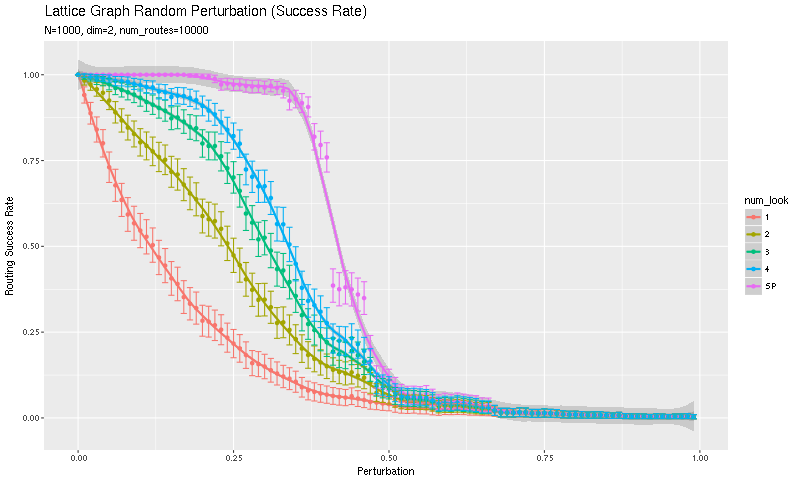

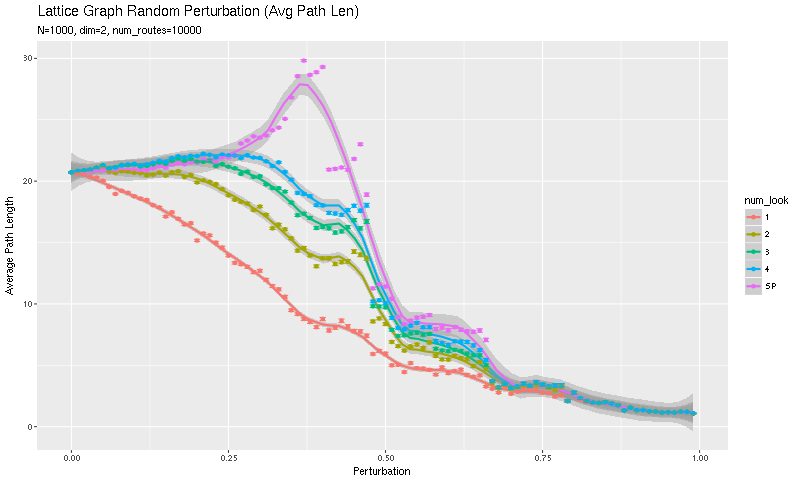

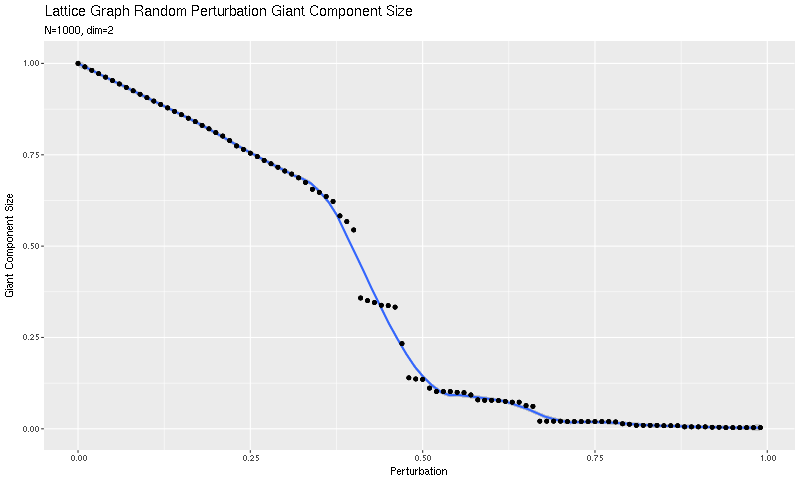

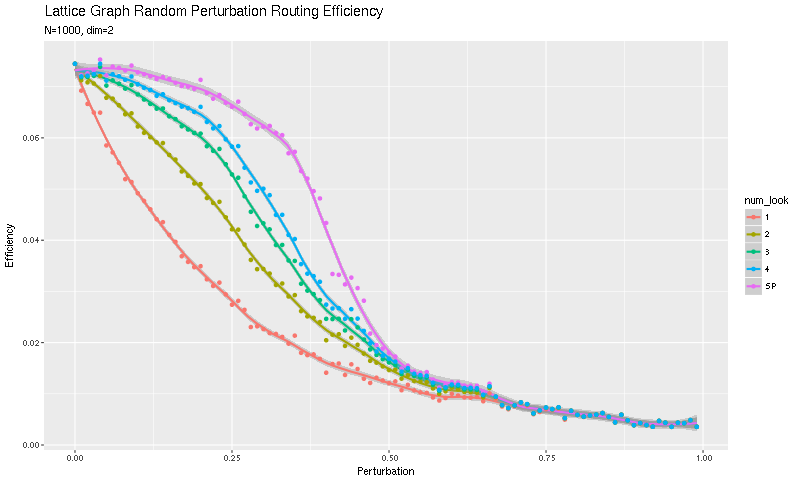

In [30]:
%%R -w 800

library(readr)

df <- read_csv("./data/N_961_strat_random_STEP_0.01_graph_lattice_numroutes_10000_dim_2_k_50_numlookahead_5_rand_21556.csv")
df$num_look <- factor(df$num_look)
library(ggplot2)

print(ggplot(df, aes(x=f, y=succ_rate, color=num_look)) + geom_smooth(span=.2) + geom_point() +
    geom_errorbar(aes(ymin=succ_rate-succ_std, ymax=succ_rate+succ_std),
                  width=.01) + 
    labs(title="Lattice Graph Random Perturbation (Success Rate)",
         subtitle="N=1000, dim=2, num_routes=10000", x="Perturbation", y="Routing Success Rate"))

print(ggplot(df, aes(x=f, y=avg_len, color=num_look)) + geom_smooth(span=.2) + geom_point() +
    geom_errorbar(aes(ymin=avg_len-avg_std_dev, ymax=avg_len+avg_std_dev),
                  width=.01) + 
    labs(title="Lattice Graph Random Perturbation (Avg Path Len)", subtitle="N=1000, dim=2, num_routes=10000",
         x="Perturbation", y="Average Path Length"))

print(ggplot(df, aes(x=f, y=giant_comp_size)) + geom_smooth(span=.2) + geom_point()+ 
    labs(title="Lattice Graph Random Perturbation Giant Component Size", subtitle="N=1000, dim=2",
         x="Perturbation", y="Giant Component Size"))
    

ggplot(df, aes(x=f, y=avg_efficiency, color=num_look)) + geom_smooth(span=.2) + geom_point()+ 
    labs(title="Lattice Graph Random Perturbation Routing Efficiency", subtitle="N=1000, dim=2",
         x="Perturbation", y="Efficiency")

In [31]:
%%R
library(readr)
library(dplyr)
library(ggplot2)

plotPerturbation <- function(filename) {
    df_heat <- read_csv(filename, col_names=FALSE)
    colnames(df_heat) <- c("x","y", "i")
    for (ival in unique(df_heat$i)) {
        df_curr <- filter(df_heat, i == ival)
        print(ggplot(df_curr, aes(x, y)) + geom_tile(color="black", fill="red") + 
            theme_classic() +
            theme(panel.background = element_rect(fill="black")))
    }
}


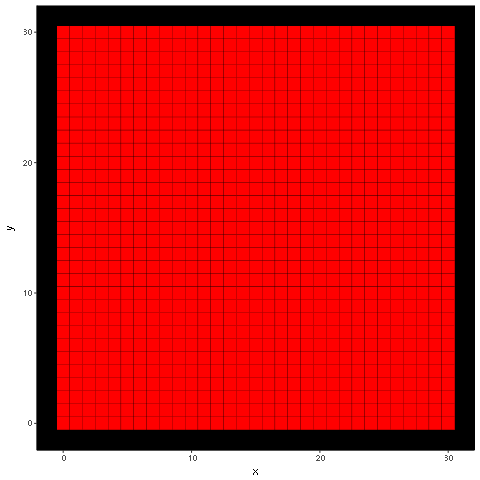

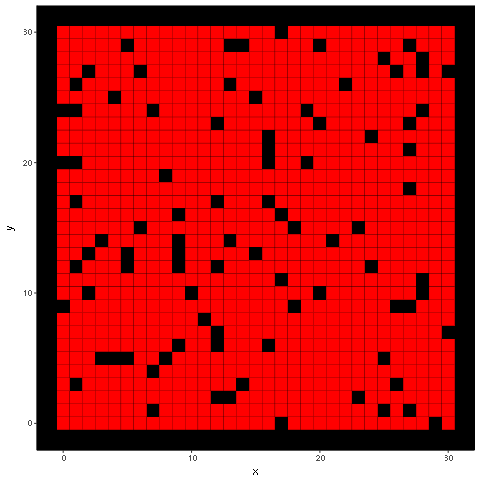

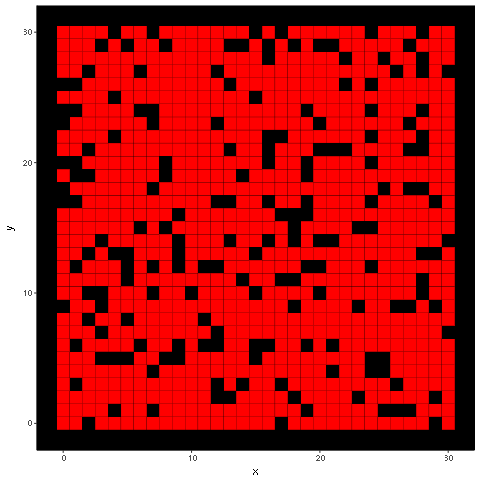

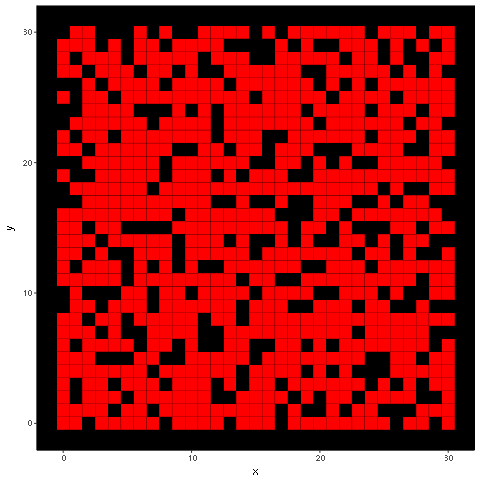

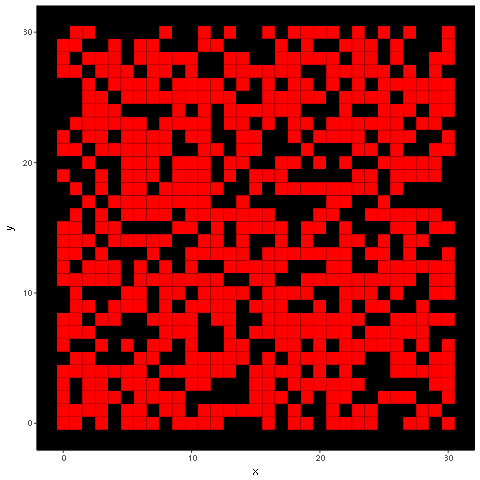

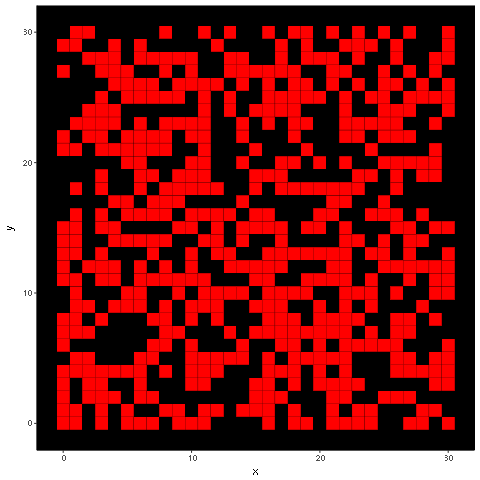

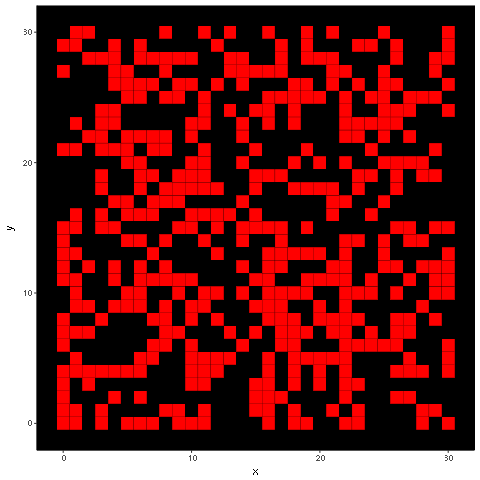

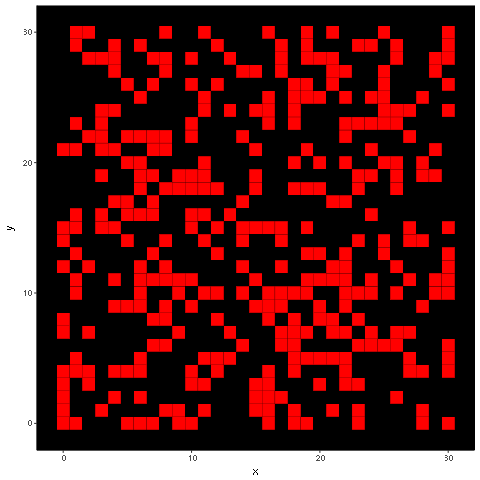

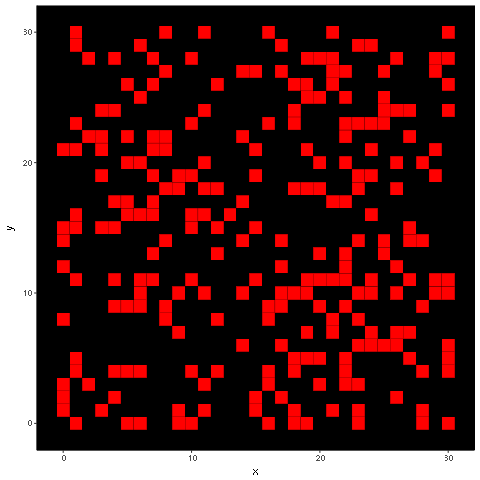

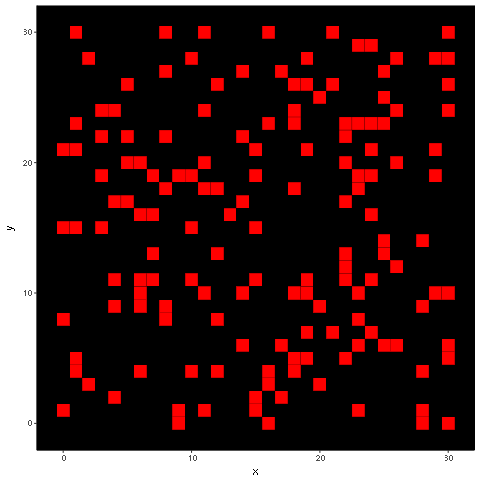

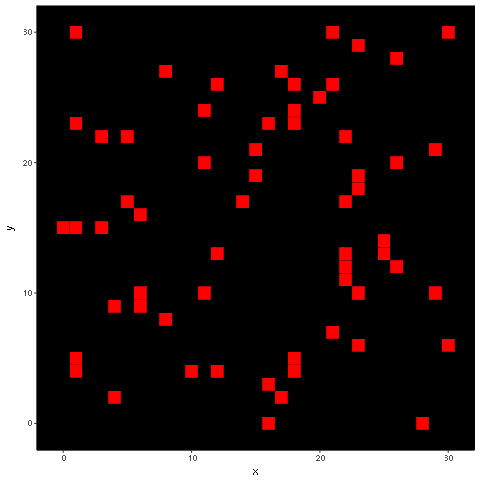

In [33]:
%%R

plotPerturbation("./data/heatmap_N_961_strat_random_graph_lattice_STEP_0.01_SEED_21556.csv")

# Lattice Graph, Localized Perturbation

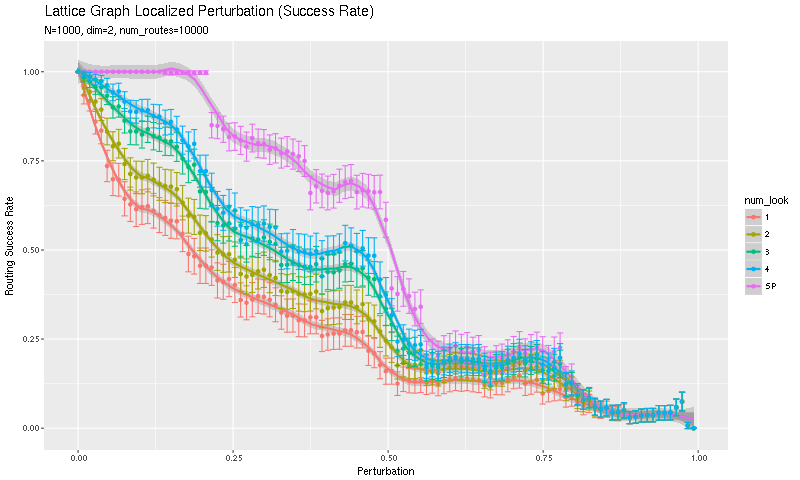

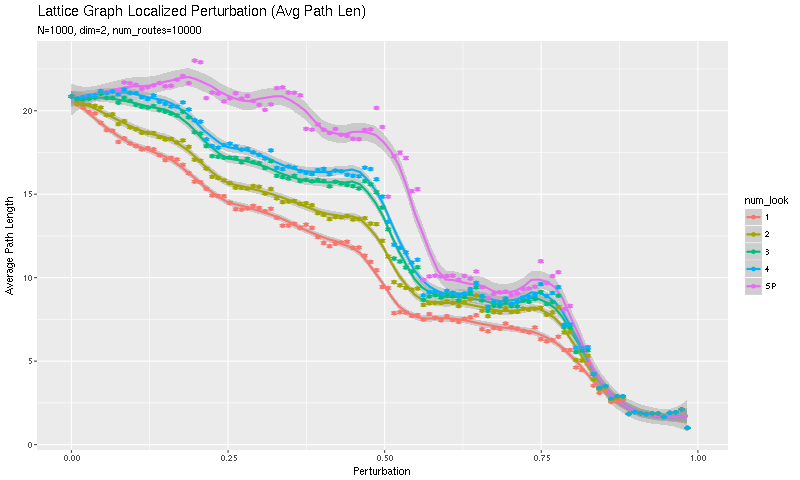

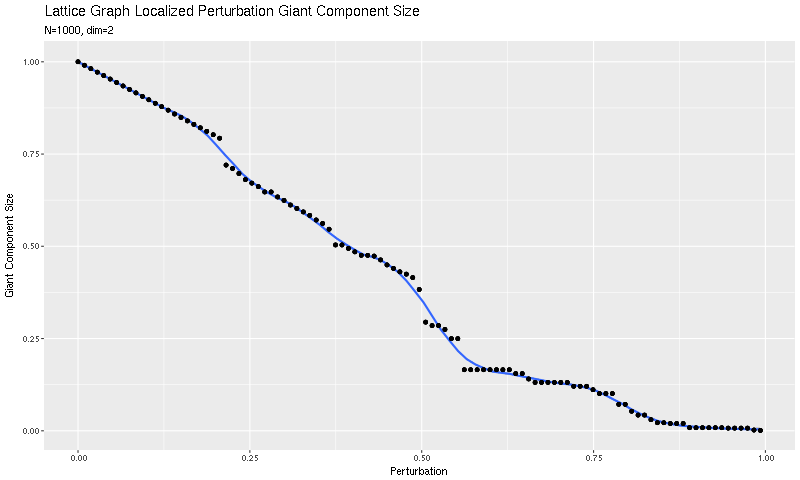

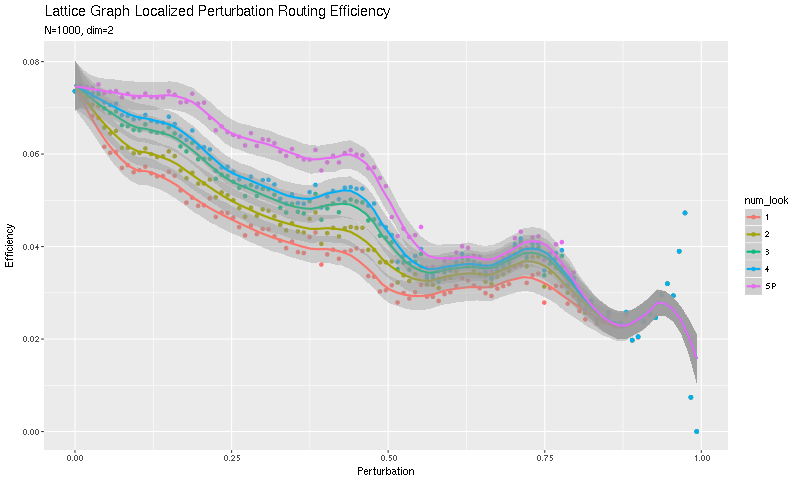

In [35]:
%%R -w 800

library(readr)

df <- read_csv("./data/N_961_strat_localized_STEP_0.01_graph_lattice_numroutes_10000_dim_2_k_50_numlookahead_5_rand_6306.csv")
df$num_look <- factor(df$num_look)
library(ggplot2)

print(ggplot(df, aes(x=f, y=succ_rate, color=num_look)) + geom_smooth(span=.2) + geom_point() +
    geom_errorbar(aes(ymin=succ_rate-succ_std, ymax=succ_rate+succ_std),
                  width=.01) + 
    labs(title="Lattice Graph Localized Perturbation (Success Rate)",
         subtitle="N=1000, dim=2, num_routes=10000", x="Perturbation", y="Routing Success Rate"))

print(ggplot(df, aes(x=f, y=avg_len, color=num_look)) + geom_smooth(span=.2) + geom_point() +
    geom_errorbar(aes(ymin=avg_len-avg_std_dev, ymax=avg_len+avg_std_dev),
                  width=.01) + 
    labs(title="Lattice Graph Localized Perturbation (Avg Path Len)", subtitle="N=1000, dim=2, num_routes=10000",
         x="Perturbation", y="Average Path Length"))

print(ggplot(df, aes(x=f, y=giant_comp_size)) + geom_smooth(span=.2) + geom_point()+ 
    labs(title="Lattice Graph Localized Perturbation Giant Component Size", subtitle="N=1000, dim=2",
         x="Perturbation", y="Giant Component Size"))

ggplot(df, aes(x=f, y=avg_efficiency, color=num_look)) +  geom_point()+ geom_smooth(span=.2) + 
    labs(title="Lattice Graph Localized Perturbation Routing Efficiency", subtitle="N=1000, dim=2",
         x="Perturbation", y="Efficiency")


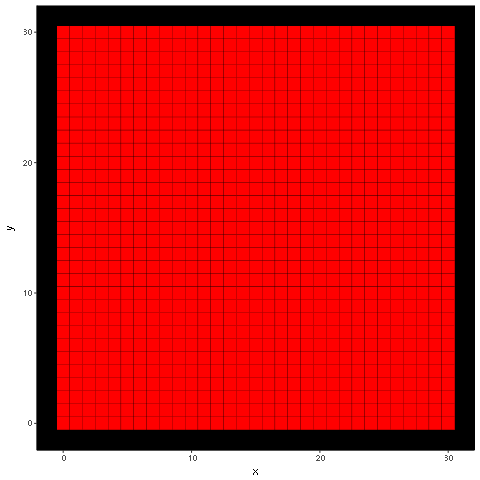

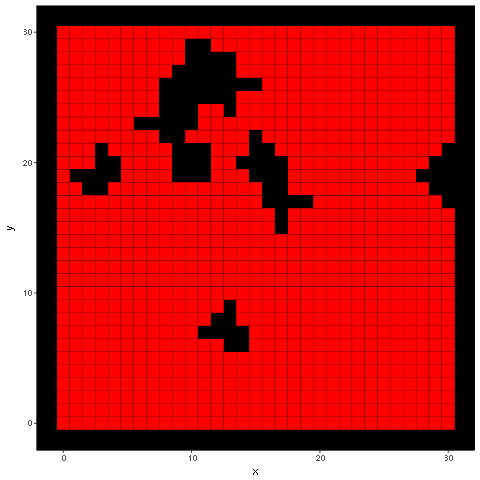

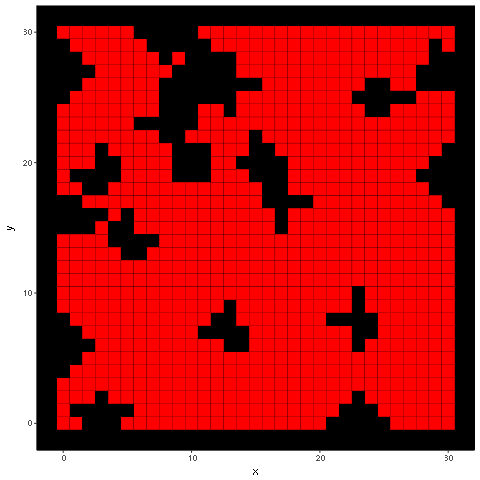

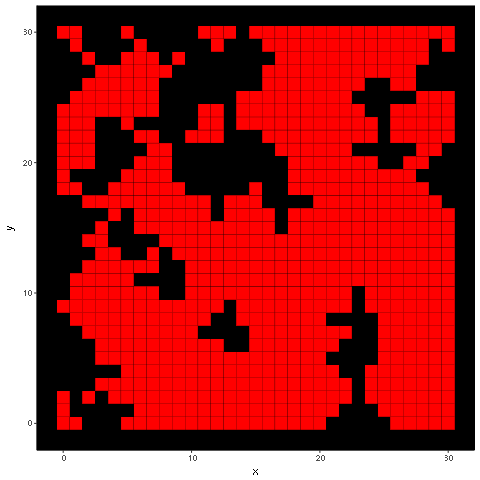

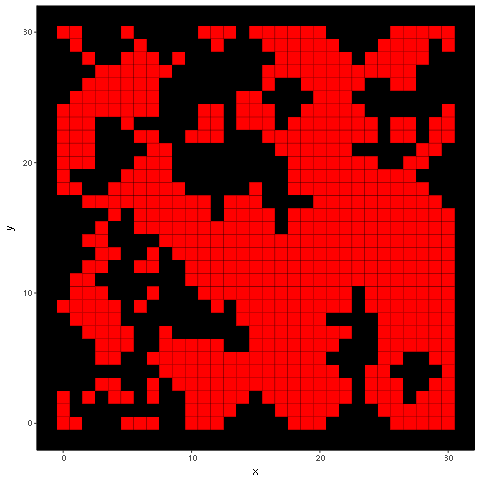

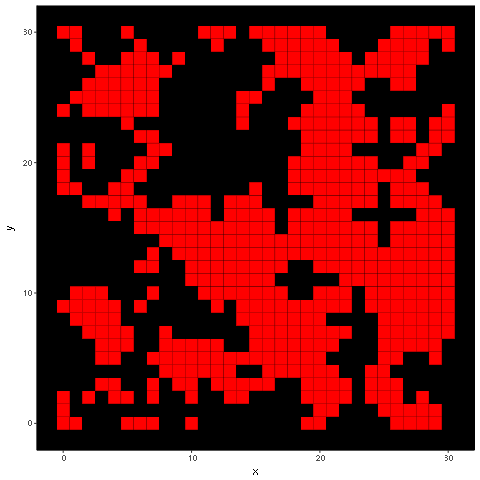

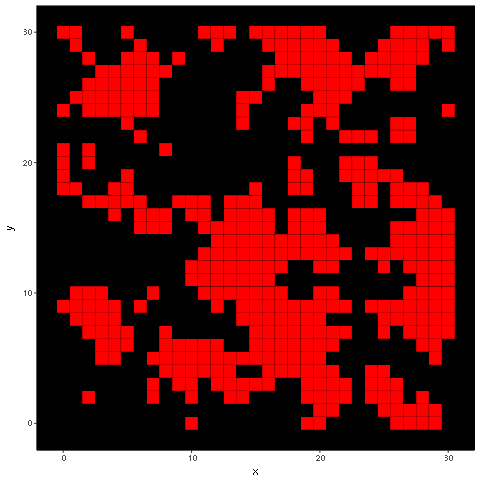

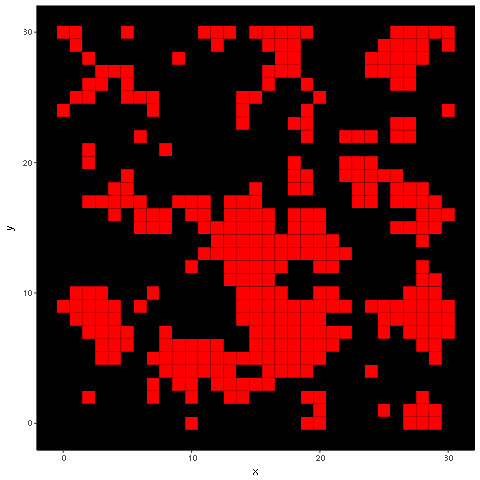

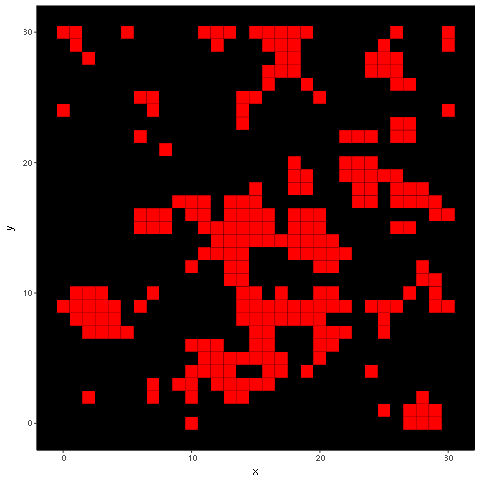

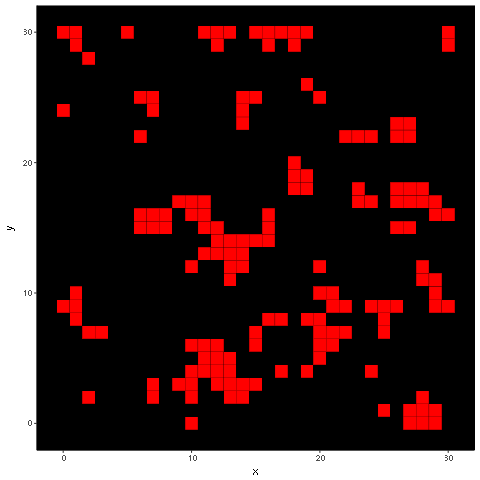

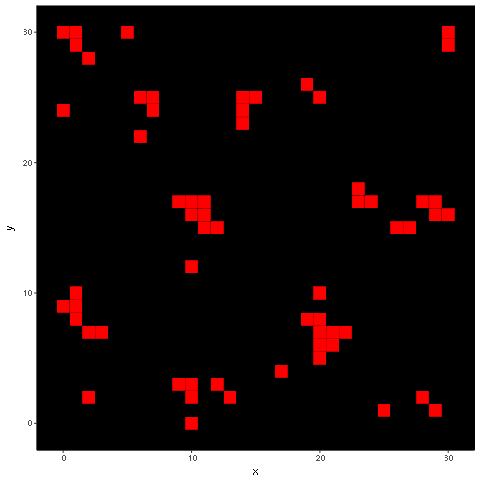

In [34]:
%%R

plotPerturbation("./data/heatmap_N_961_strat_localized_graph_lattice_STEP_0.01_SEED_6306.csv")

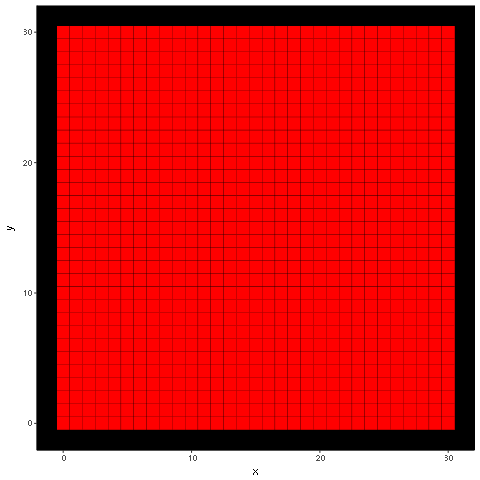

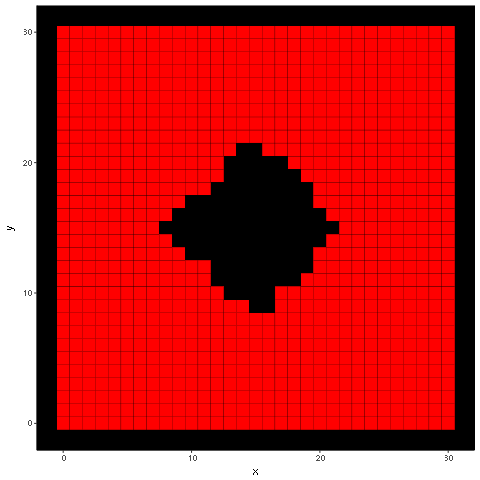

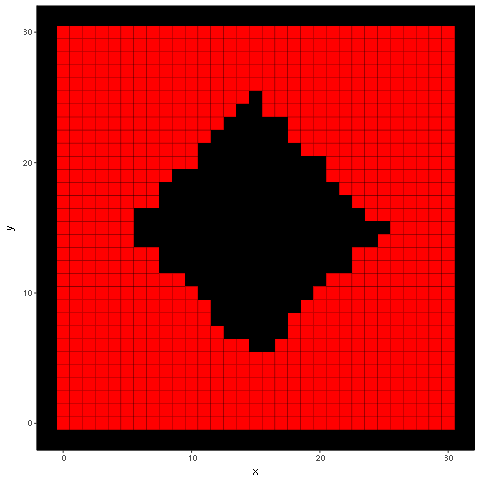

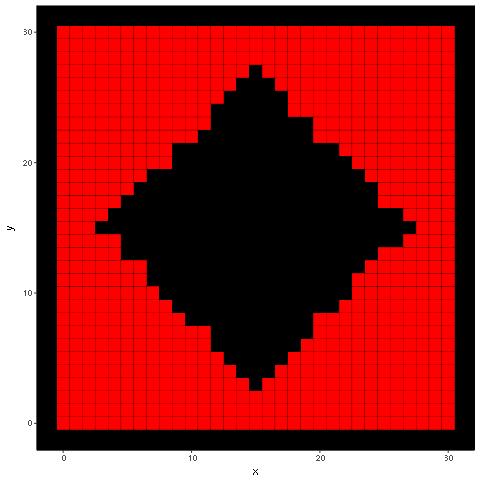

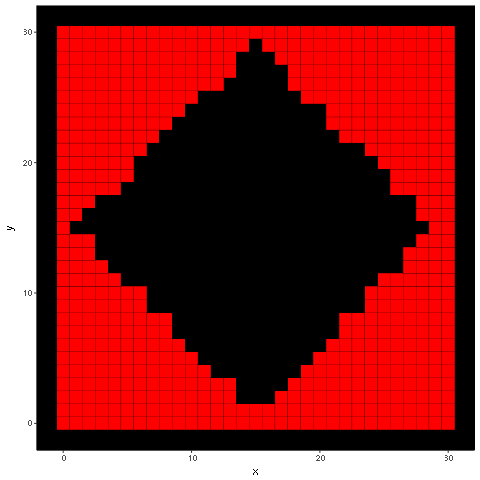

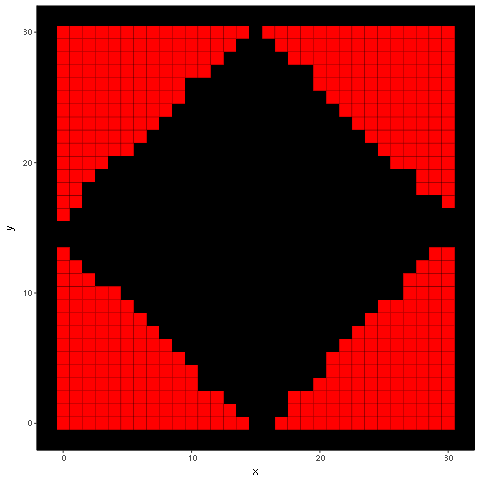

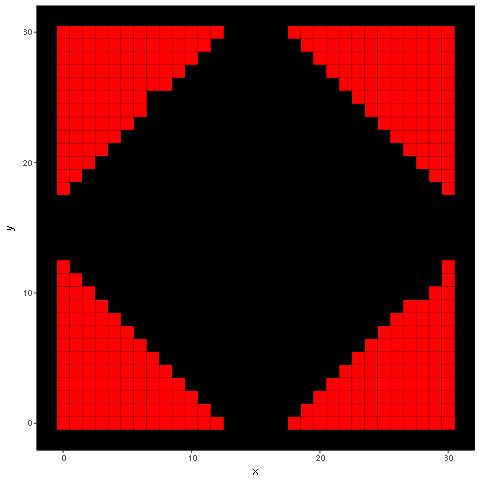

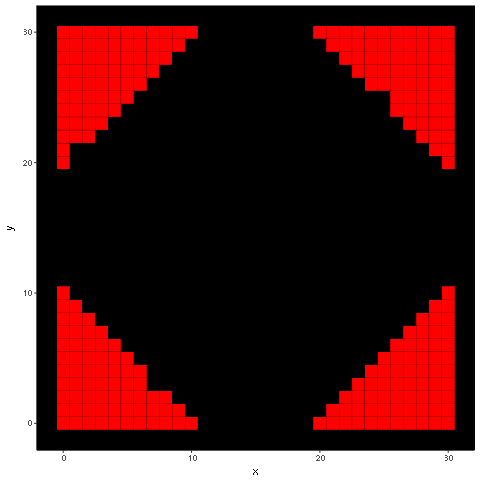

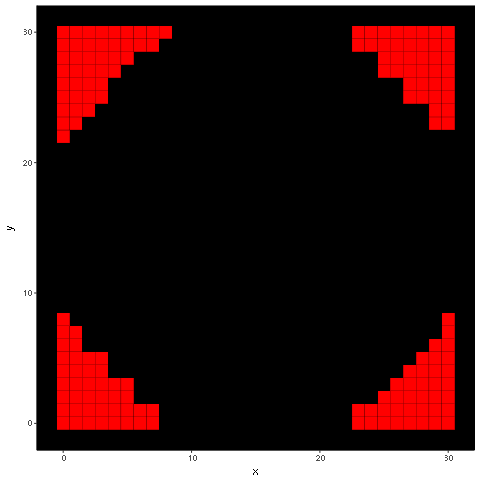

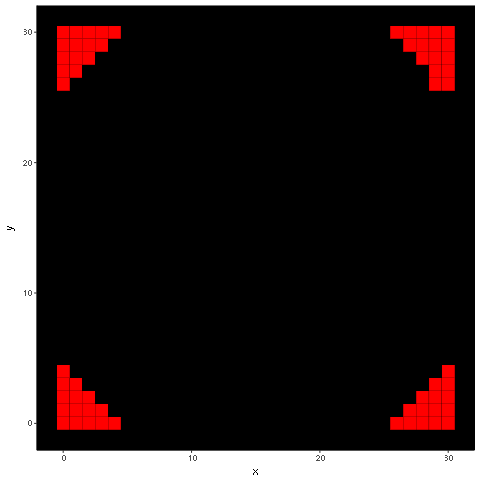

In [36]:
%%R

plotPerturbation("./data/heatmap_N_961_strat_localized_expanding_hole_graph_lattice_STEP_0.01_SEED_32571.csv")

## Notes April 13

Random sample of src, dest (maybe special characteristics), route with SP, k=1, ..., 5

Mostly unperturbed graphs, and also slightly perturbed graphs (I think very perturbed graphs won't be helpful)

Try to catch test cases where the different routing algos perform differently